In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.axes import Axes
from matplotlib.patches import Rectangle
import matplotlib.patheffects as path_effects

In [2]:
def draw_y_lines(boundaries: list, ax: Axes):
    for boundary in boundaries:
        ax.axhline(y=boundary, linestyle='--', color='0.6')


def draw_x_lines(boundaries: list, ax: Axes):
    for boundary in boundaries:
        ax.axvline(x=boundary, linestyle='--', color='0.6')

def plot_area_matrix(
    clean_data_df: pd.DataFrame,
    x_feature: str,
    y_feature: str,
    count_feature: str,
    x_boundaries: list,
    y_boundaries: list,
    ax: Axes,
):
    draw_x_lines(boundaries=x_boundaries, ax=ax)
    draw_y_lines(boundaries=y_boundaries, ax=ax)
    sns.scatterplot(data=clean_data_df,
                    x=x_feature,
                    y=y_feature,
                    ax=ax,
                    hue=count_feature,
                    linewidth=1,
                    edgecolor='black',
                    alpha=0.7,
                    style=count_feature)

    for i in range(len(x_boundaries) - 1):
        x_left_bound = x_boundaries[i]
        x_right_bound = x_boundaries[i+1]
        for j in range(len(y_boundaries) - 1):
            y_left_bound = y_boundaries[j]
            y_right_bound = y_boundaries[j+1]
            # filtering & counting
            sub_data_df = clean_data_df[(clean_data_df[y_feature].between(y_left_bound, y_right_bound)) &
                                        (clean_data_df[x_feature].between(x_left_bound, x_right_bound))]
            total_count = sub_data_df.shape[0]
            if total_count < 1:
                continue
            count_map = sub_data_df[count_feature].value_counts()

            if total_count > 0:
                no_count = count_map[0] if 0 in count_map.index else 0
                yes_count = count_map[1] if 1 in count_map.index else 0

                o_y = y_left_bound
                o_x = x_left_bound
                rect_height = y_right_bound - o_y
                rect_width = x_right_bound - o_x

                yes_ratio = yes_count / total_count

                area_color = list(mpl.colormaps['coolwarm'](yes_ratio))
                area_color[3] = 0.8

                rect = Rectangle(
                    (o_x, o_y), rect_width, rect_height, facecolor=area_color
                )
                # label_str = f"{yes_ratio:.2f}\n0: {no_count}\n1: {yes_count}\nTotal: {total_count}"
                label_str = f"{yes_ratio:.2f}\nTotal: {total_count}"
                ax.add_patch(rect)
                ax.text(
                    x=o_x + rect_width / 2,
                    y=o_y + rect_height / 2,
                    s=label_str,
                    color='white',
                    fontsize=10,
                    ha='center',
                    va='center',
                    weight='bold',
                    path_effects=[path_effects.withStroke(linewidth=2, foreground="black")]
                )

In [ ]:
data_df=pd.read_csv("data/diabetes.csv")
clean_data_df = data_df[
    (data_df['Glucose'] != 0) &
    # (data_df['BloodPressure'] != 0) &
    # (data_df['SkinThickness'] != 0) &
    # (data_df['Insulin'] != 0) &
    (data_df['BMI'] != 0)
]

pregnancies_boundaries = [-0.5, 0.5, 3.5, 6.5, 9.5, 17.5]
glucose_boundaries = [53, 70, 97.5, 125, 162.5, 200]
blood_pressure_boundaries = [23, 60, 80, 90, 120]
skin_thickness_boundaries = [6, 21, 29, 37, 64]
insulin_boundaries = [13, 76.75, 125.5, 190, 847]
bmi_boundaries = [18, 18.5, 25, 30, 35, 40, 68]
diabetes_pedigree_function_boundaries = [0, 0.27, 0.45, 0.69, 2.24]
age_boundaries = [18, 22, 43, 51, 82]


clean_data_df.describe()

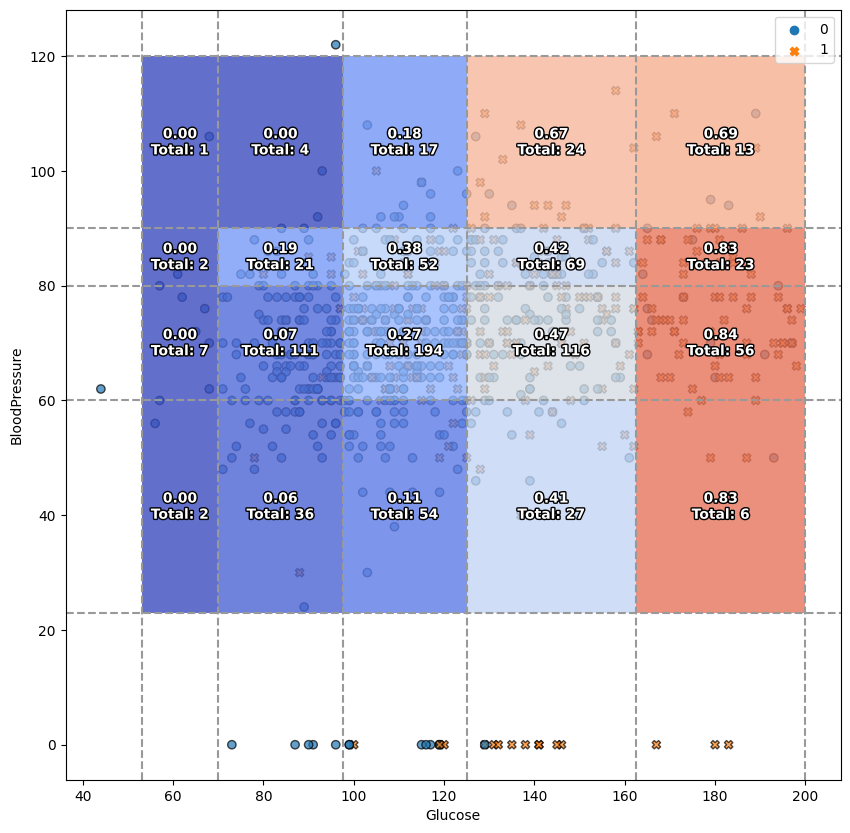

In [4]:
fig, ax = plt.subplots(figsize=(10, 10))

draw_x_lines(boundaries=glucose_boundaries, ax=ax)
draw_y_lines(boundaries=blood_pressure_boundaries, ax=ax)
sns.scatterplot(data=clean_data_df,
                x='Glucose',
                y='BloodPressure',
                ax=ax,
                hue='Outcome',
                # palette=hue_colors,
                linewidth=1,
                edgecolor='black',
                alpha=0.7,
                style='Outcome')

x_boundaries = glucose_boundaries
y_boundaries = blood_pressure_boundaries
x_feature = 'Glucose'
y_feature = 'BloodPressure'
count_feature = 'Outcome'

for i in range(len(x_boundaries) - 1):
    x_left_bound = x_boundaries[i]
    x_right_bound = x_boundaries[i+1]
    for j in range(len(y_boundaries) - 1):
        y_left_bound = y_boundaries[j]
        y_right_bound = y_boundaries[j+1]
        # filtering & counting
        sub_data_df = clean_data_df[(clean_data_df[y_feature].between(y_left_bound, y_right_bound)) &
                                    (clean_data_df[x_feature].between(x_left_bound, x_right_bound))]
        total_count = sub_data_df.shape[0]
        if total_count < 1:
            continue
        count_map = sub_data_df[count_feature].value_counts()

        if total_count > 0:
            no_count = count_map[0] if 0 in count_map.index else 0
            yes_count = count_map[1] if 1 in count_map.index else 0

            o_y = y_left_bound
            o_x = x_left_bound
            rect_height = y_right_bound - o_y
            rect_width = x_right_bound - o_x

            yes_ratio = yes_count / total_count

            area_color = list(mpl.colormaps['coolwarm'](yes_ratio))
            area_color[3] = 0.8

            rect = Rectangle(
                (o_x, o_y), rect_width, rect_height, facecolor=area_color
            )
            # label_str = f"{yes_ratio:.2f}\n0: {no_count}\n1: {yes_count}\nTotal: {total_count}"
            label_str = f"{yes_ratio:.2f}\nTotal: {total_count}"
            ax.add_patch(rect)
            ax.text(
                x=o_x + rect_width / 2,
                y=o_y + rect_height / 2,
                s=label_str,
                color='white',
                fontsize=10,
                ha='center',
                va='center',
                weight='bold',
                path_effects=[path_effects.withStroke(linewidth=2, foreground="black")]
            )
plt.legend(loc='upper right')
plt.show()


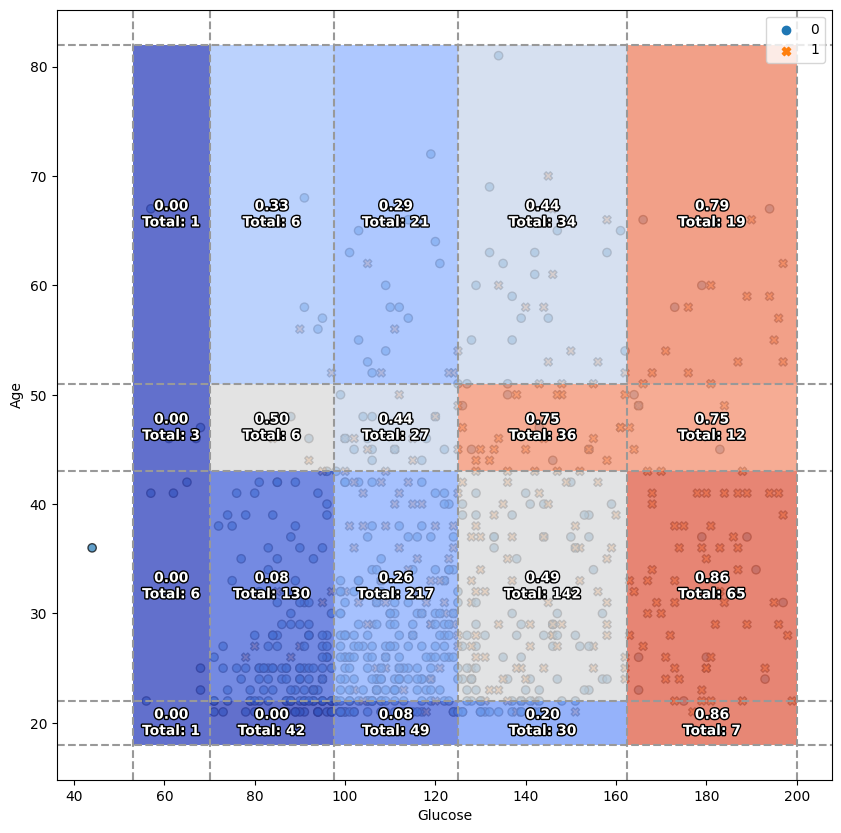

In [5]:
fig, ax = plt.subplots(figsize=(10, 10))

plot_area_matrix(
    clean_data_df=clean_data_df,
    x_feature='Glucose',
    y_feature='Age',
    count_feature='Outcome',
    x_boundaries=glucose_boundaries,
    y_boundaries=age_boundaries,
    ax=ax
)

plt.legend(loc='upper right')
plt.show()

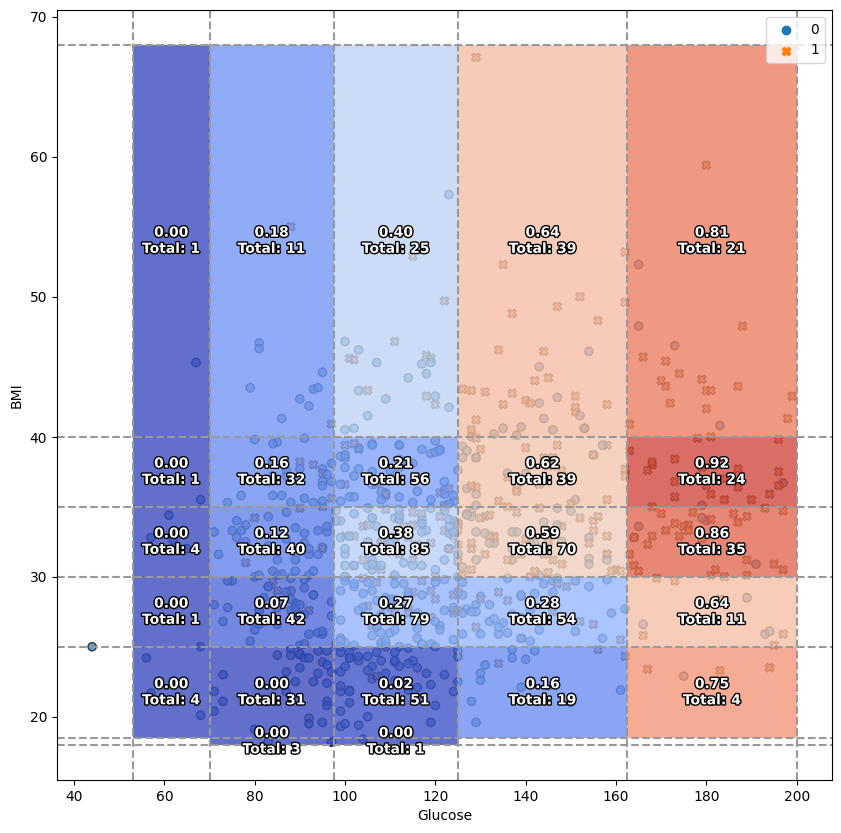

In [6]:
fig, ax = plt.subplots(figsize=(10, 10))

plot_area_matrix(
    clean_data_df=clean_data_df,
    x_feature='Glucose',
    y_feature='BMI',
    count_feature='Outcome',
    x_boundaries=glucose_boundaries,
    y_boundaries=bmi_boundaries,
    ax=ax
)

plt.legend(loc='upper right')
plt.show()